# Data Analyst Associate Case Study Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

First, I check the top 5 rows of the dataset. Knowing the column names and what the dataset inside looks like.
Second, I check the info about the dataset. To see whether there are null values and data types for each column.
Confirming the locations in the dataset match the criteria in the description.
But the data type of the 'Claim Amount' column is 'object', we should turn them to the numeric type.
Last but not least, I turn the null value in the 'Cause' column to 'unknow' to match the criteria.

In [17]:
#read the CSV file
data = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/claims.csv')
data.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [19]:
data['Location'].unique()

array(['RECIFE', 'SAO LUIS', 'FORTALEZA', 'NATAL'], dtype=object)

In [20]:
data['Claim Amount'] = data['Claim Amount'].str.strip('R$')
data['Claim Amount'] = pd.to_numeric(data['Claim Amount'].str.replace(',', ''))
data.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


The 'Claim Amount' and 'Amount Paid' data now matches the criteria in the data dictionary.

In [21]:
data['Cause'].fillna('unknown', inplace = True)
data.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


The 'Cause' data now matches the criteria in the data dictionary.

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief


## Customer Question

The legal team has given you a data set where each row is a claim made against the
company. They would like you to answer the following questions:

- How does the number of claims differ across locations?
- What is the distribution of time to close claims?
- How does the average time to close claims differ by location?

**Reviewing the figures below, we can find out:**

- It's very intuitive to match the number with a bar chart. The chart shows that SAO LUIS has the longest bar. It means SAO LUIS has the most claims, and NATAL has the fewest claims in this dataset. 
- I want to show a box plot and a histogram to describe the distribution of time to close claims. Then call the exact number of the median and average time. Most of the claims close in 1,000 days, the median time is 638.5 days and the average time of all claims is about 832 days.  8 claims are more than 2,000 days to close.
- It's easy to use a bar chart to answer the question simply. But I want to show the distribution of time to close claims differ by location. The default boxplot doesn't draw the average in it, so I draw them manually. Comparing the four locations, SAO LUIS processed the most time to close claims on average and NATAL has the fewest time.

In [22]:
data['Location'].value_counts()

SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

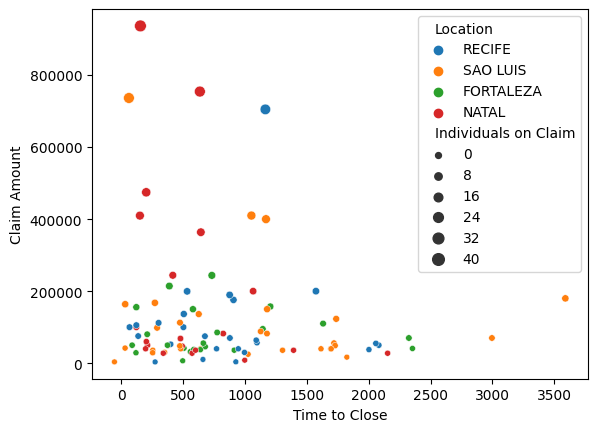

In [24]:
#Check the relationship between claim amount, time to close claims, loaction and number of individuals on claims.
sns.scatterplot(data = data, x = 'Time to Close', y = 'Claim Amount', hue = 'Location', size = 'Individuals on Claim')
plt.show()

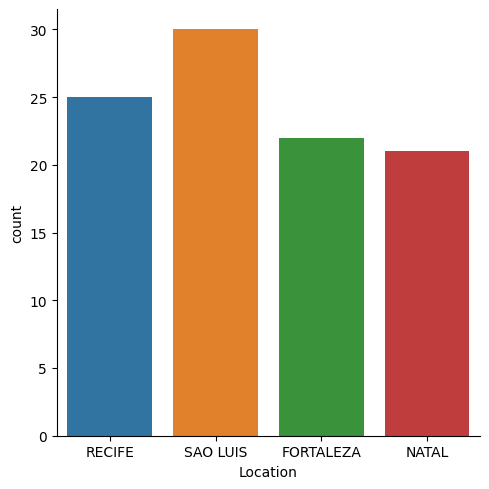

In [23]:
#Number of claims differ across locations
sns.catplot(x = 'Location', data = data, kind = 'count')
plt.show()

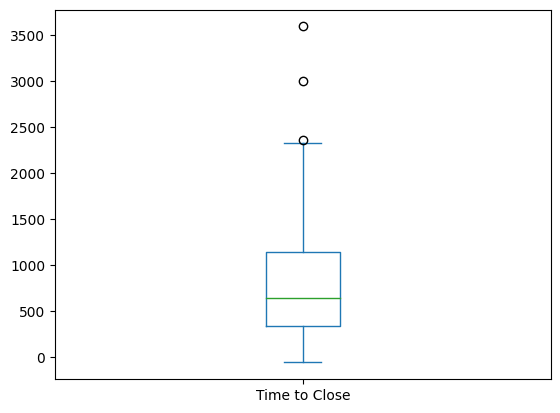

In [25]:
#Check the distribution of time to close claims.
data['Time to Close'].plot(kind = 'box')
plt.show()

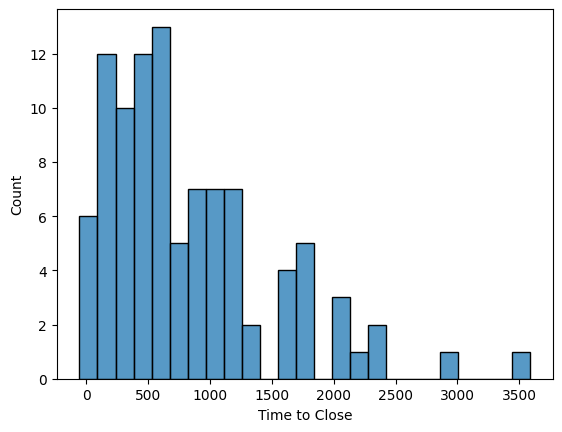

In [27]:
#Distribution of time to close claims
sns.histplot(data, x= 'Time to Close', bins = 25)
plt.show()

In [26]:
#Calculate the numbers.
time_distribution = [np.median(data['Time to Close']), np.mean(data['Time to Close']), 	max(data['Time to Close']), min(data['Time to Close']), pd.value_counts(data['Time to Close'] > 2000)]

print(time_distribution)

[638.5, 832.3469387755102, 3591, -57, False    90
True      8
Name: Time to Close, dtype: int64]


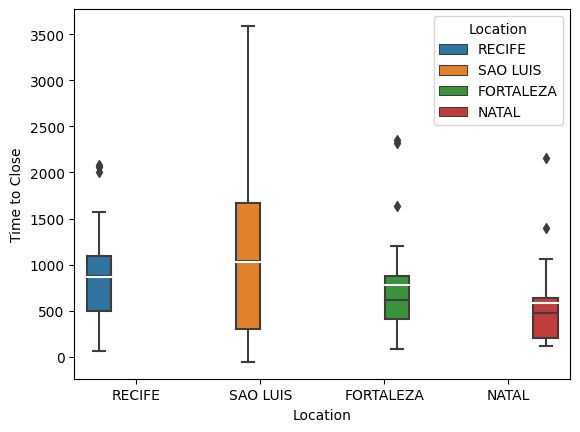

In [36]:
#The average time to close claims differ by location
meanlineprops = dict(linestyle='-', linewidth=1.5, color='white')
sns.boxplot(x = 'Location', y = 'Time to Close', data = data, hue = 'Location', showmeans = True, meanline = True, meanprops = meanlineprops)
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric, have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study